<a href="https://colab.research.google.com/github/OlgaTora/CarPrice_ML_Streamlit/blob/master/Cars_AI_Education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and description of dataset

In [4]:
from plotly import express
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import plotly

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
import math
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFECV

In [5]:
try:
  df = pd.read_csv('/content/cars.csv')
except:
  print('Загрузите датасет')


Признаки:

* year — год выпуска
* max_power — мощность (л. с.)
* name — модель автомобиля
* km_driven — пробег (км)
* fuel — тип топлива
* owner - количество собствеников
* seller_type - продавец
* transmissiom - коробка передач
* engine - объем двигателя
* milaege - расход топлива
* seats - количество мест
* torque - крутящий момент

Целевой признак:
* selling_price - цена

# Utils

In [6]:
# Фунция для расчета и вывода показателей моделей

def count_metrics(name_of_model):
  name_of_model.fit(X_train, y_train)
  y_pred = name_of_model.predict(X_test)
  crossr = cross_val_score(estimator = name_of_model, X = X_train, y = y_train, cv = 10, verbose = 0)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f"The R2 train value is: {round(r2_score(y_train,name_of_model.predict(X_train)), 4)}")
  print(f"Results of {name_of_model}")
  print(f"The R2 value of {name_of_model} is {round(r2, 4)}")
  print(f"MAE Error is {round(mae, 6)}")
  print(f"Cross validation train is {crossr}")
  print("____________________________")

In [7]:
# для кодирования категориальных признаков
def encoder_cat(name_of_X):
    cat_feat = name_of_X.select_dtypes(include='object')
    for columns in cat_feat:
      encoder = preprocessing.LabelEncoder()
      encoder = encoder.fit(name_of_X[columns])
      name_of_X[columns] = encoder.transform(name_of_X[columns])


In [8]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# EDA & Feature engeeniring

In [9]:
df.shape

(6999, 13)

In [10]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [11]:
# удалим дубликаты строк
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(6014, 13)

In [12]:
df.shape

(6014, 13)

In [13]:
def descr(data):
    temp = data.describe()
    temp.loc['nan'] = [data[el].isna().sum() for el in data.describe().columns]
    temp.loc['duplicates'] = [data.duplicated().sum() for el in data.describe().columns]
    display(temp)

    for el in data.columns:
        print(el)
        print(data[el].value_counts(dropna=False))
        print(f'NAN:{data[el].isna().sum()}')
        print(f' Unique:{data[el].nunique()}')
        print()

In [14]:
descr(df)

,year,selling_price,km_driven,seats
count,6014.000000,6.014000e+03,6.014000e+03,5824.000000
mean,2013.447456,5.219820e+05,7.376415e+04,5.437672
std,4.079920,5.338426e+05,5.961075e+04,0.991755
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,5.000000
50%,2014.000000,4.099990e+05,7.000000e+04,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000
nan,0.000000,0.000000e+00,0.000000e+00,190.000000
duplicates,0.000000,0.000000e+00,0.000000e+00,0.000000


name
Maruti Swift Dzire VDI                          107
Maruti Alto 800 LXI                              65
Maruti Alto LXi                                  60
Maruti Swift VDI BSIV                            52
Maruti Swift VDI                                 50
                                               ... 
Hyundai Verna CRDi 1.4 EX                         1
Mitsubishi Lancer 2.0 L Diesel LX                 1
Maruti Celerio X ZXI Option BSIV                  1
Honda Jazz VX Diesel                              1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: name, Length: 1924, dtype: int64
NAN:0
 Unique:1924

year
2017    696
2016    615
2015    585
2018    536
2012    524
2014    503
2013    488
2011    469
2010    329
2019    306
2009    203
2008    182
2007    159
2006    102
2005     82
2020     59
2004     49
2003     39
2002     22
2000     19
1999     12
1997     10
1998      9
2001      7
1996      3
1994      3
1983      1
1995      1
1991      1
Name: year,

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6014 entries, 0 to 6013
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6014 non-null   object 
 1   year           6014 non-null   int64  
 2   selling_price  6014 non-null   int64  
 3   km_driven      6014 non-null   int64  
 4   fuel           6014 non-null   object 
 5   seller_type    6014 non-null   object 
 6   transmission   6014 non-null   object 
 7   owner          6014 non-null   object 
 8   mileage        5824 non-null   object 
 9   engine         5824 non-null   object 
 10  max_power      5827 non-null   object 
 11  torque         5823 non-null   object 
 12  seats          5824 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 610.9+ KB


Обозначим фронт работ:
1. пропуски: проверить по одним и тем же строкам пропущены значения. Попробовать заменить пропуски, при невозможности удалить. Это 3.1%
2. km_driven сделать пробег группами??
3. Перевести инты в инт8, где это возможно для экономии памяти и флоат тоже
4. Закодировать категориальные признаки
5. Значения в mileage привести к одному знаменателю
6. Проверить каждый признак на выбросы и зависимость с целевым
7. Проверить выбросы по целевому признаку

Начнем с целевого признака

<Axes: xlabel='selling_price'>

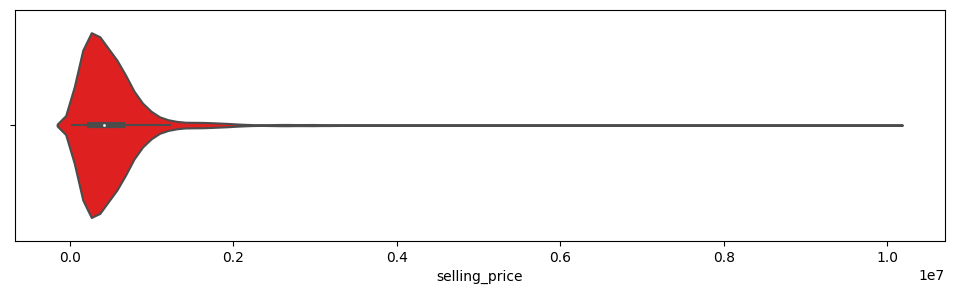

In [16]:
plt.figure(figsize=(12,3))
sns.violinplot(x=df.selling_price, color='red')

Проверим идею про пропуски в одинаковых местах

In [17]:
df.selling_price.describe()

count    6.014000e+03
mean     5.219820e+05
std      5.338426e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.099990e+05
75%      6.400000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [18]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          190
engine           190
max_power        187
torque           191
seats            190
dtype: int64

In [19]:
nan_cols = [el for el in df.columns if df[df[el].isna()].selling_price.count() > 0]
nan_cols

['mileage', 'engine', 'max_power', 'torque', 'seats']

Пока заполним нулями, потом подумаю что делать с ними

In [20]:
df_nan = df.loc[df.torque.isna() & df.seats.isna() & df.engine.isna() & df.max_power.isna() & df.mileage.isna()]
df_nan

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
12,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
69,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
78,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
107,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5765,Hyundai Santro Xing XG,2004,70000,70000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
5907,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
5919,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
5967,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [21]:
df= df.fillna(0)

Итак, название модели: у нас 1924 наименования при датасете в 6000 строк.

In [22]:
df.name.value_counts()

Maruti Swift Dzire VDI                          107
Maruti Alto 800 LXI                              65
Maruti Alto LXi                                  60
Maruti Swift VDI BSIV                            52
Maruti Swift VDI                                 50
                                               ... 
Hyundai Verna CRDi 1.4 EX                         1
Mitsubishi Lancer 2.0 L Diesel LX                 1
Maruti Celerio X ZXI Option BSIV                  1
Honda Jazz VX Diesel                              1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: name, Length: 1924, dtype: int64

In [23]:
df[['mark', 'model']] = df['name'].str.split(' ', 1, expand=True)

<ipython-input-23-52e83113c084>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['mark', 'model']] = df['name'].str.split(' ', 1, expand=True)


In [24]:
df = df.drop(columns=['name'])

In [25]:
df.mark.value_counts()

Maruti           1886
Hyundai          1083
Mahindra          629
Tata              544
Honda             317
Toyota            314
Ford              313
Chevrolet         192
Renault           179
Volkswagen        157
Nissan             63
Skoda              61
Datsun             51
Mercedes-Benz      44
BMW                42
Fiat               39
Audi               31
Jeep               20
Mitsubishi          8
Jaguar              8
Volvo               8
Force               4
Isuzu               4
Land                3
MG                  3
Daewoo              3
Kia                 3
Ambassador          3
Lexus               1
Peugeot             1
Name: mark, dtype: int64

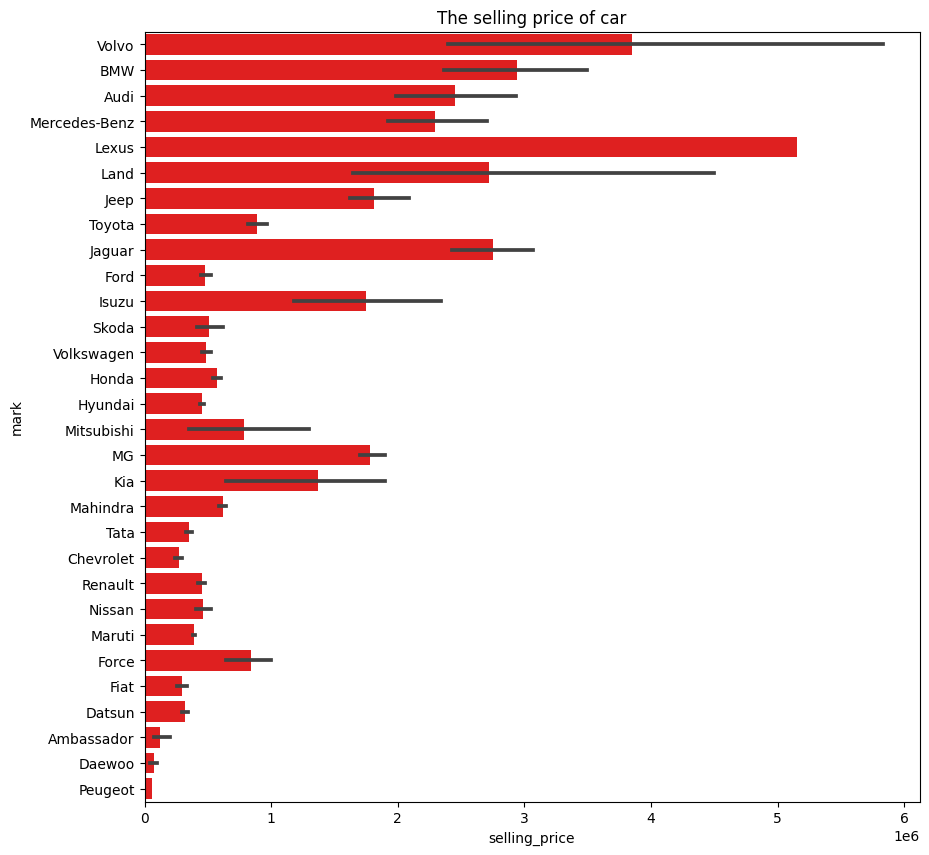

In [26]:
top_sell = df.sort_values(by='selling_price', ascending=False)
figure = plt.figure(figsize=(10,10))
sns.barplot(y=top_sell.mark, x=top_sell.selling_price, color='red')
plt.xticks()
plt.xlabel('selling_price')
plt.ylabel('mark')
plt.title('The selling price of car')
plt.show()

In [27]:
df[['model', 'info']] = df['model'].str.split(' ', 1, expand=True)
df = df.drop(columns=['info'])

<ipython-input-27-1dd842a8a2b3>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['model', 'info']] = df['model'].str.split(' ', 1, expand=True)


 Посмотрим на столбцы с километражем, переведем их в сотни км

In [28]:
df['km_driven'] = df['km_driven'] /1000

In [29]:
df['km_driven'].describe()

count    6014.000000
mean       73.764150
std        59.610747
min         0.001000
25%        39.000000
50%        70.000000
75%       100.000000
max      2360.457000
Name: km_driven, dtype: float64

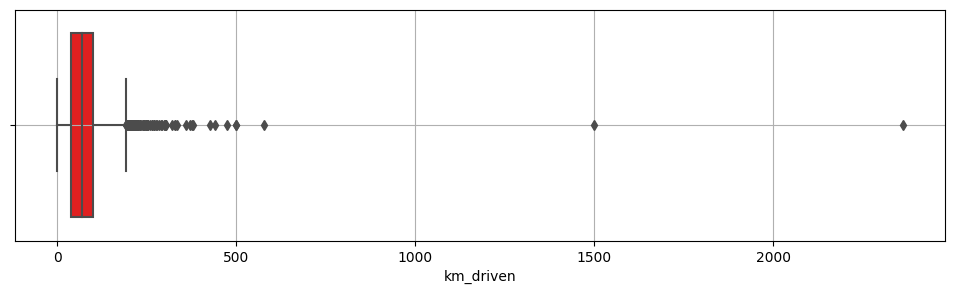

In [30]:
plt.figure(figsize=(12,3))
sns.boxplot(x = 'km_driven', data = df, color='red')
plt.grid()

У нас есть выбросы, посмотрим что там

In [31]:
df_min = df[df.km_driven > 1400]
df_min

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mark,model
1416,2012,500000,1500.000,Diesel,Individual,Manual,First Owner,15.1 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.0,Mahindra,XUV500
2731,2007,550000,2360.457,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0,Hyundai,i20


За 12 лет одна машина проехала 2.300.000 км, а вторая за 7 лет - 1.500.000 км? Думаю, здесь ошибка

In [32]:
df = df.loc[df.km_driven < 1500]

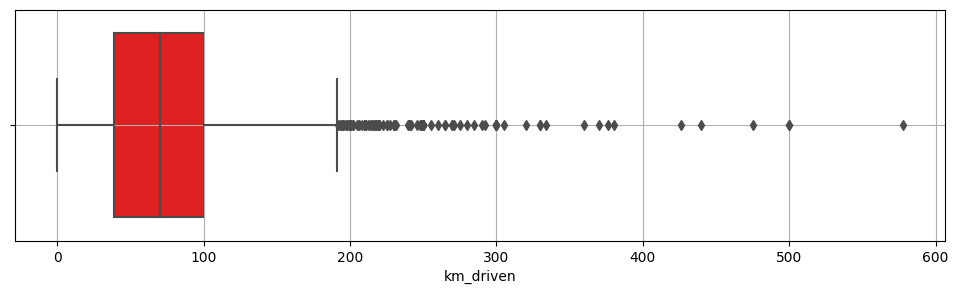

In [33]:
plt.figure(figsize=(12,3))
sns.boxplot(x = 'km_driven', data = df, color='red')
plt.grid()

Можно пробег распределить по группам, посмотрим попозже.
Пока взглянем на зависимость целевого признака

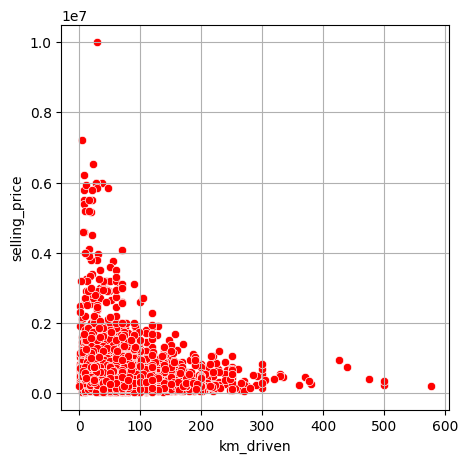

In [34]:
plt.figure(figsize=(5,5))
sns.scatterplot(x ='km_driven', y='selling_price', data=df, color='red')
plt.grid()

Посмотрим ситуацию по годам выпуска

<Axes: xlabel='year', ylabel='Count'>

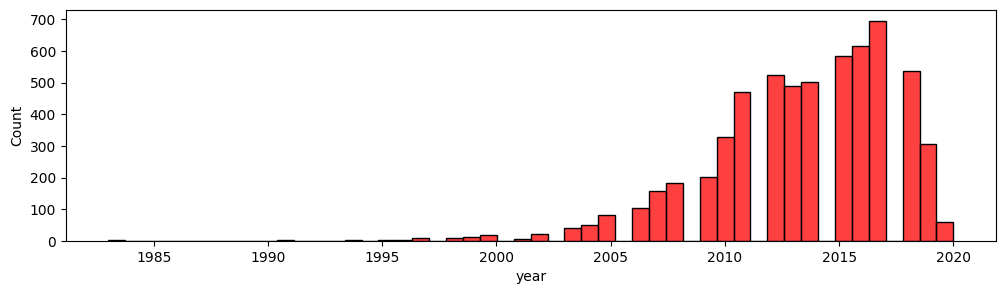

In [35]:
plt.figure(figsize=(12,3))
sns.histplot(df.year,bins=50, color='red')

Как видим, по годам выбросов нет. Есть автомобили старше 20 лет, но такое реально существует. Посмотрим зависимость целевого признака

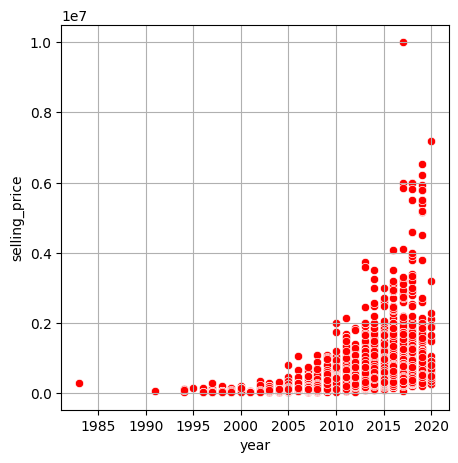

In [36]:
plt.figure(figsize=(5,5))
sns.scatterplot(x ='year', y='selling_price', data=df, color='red')
plt.grid()

Топливо

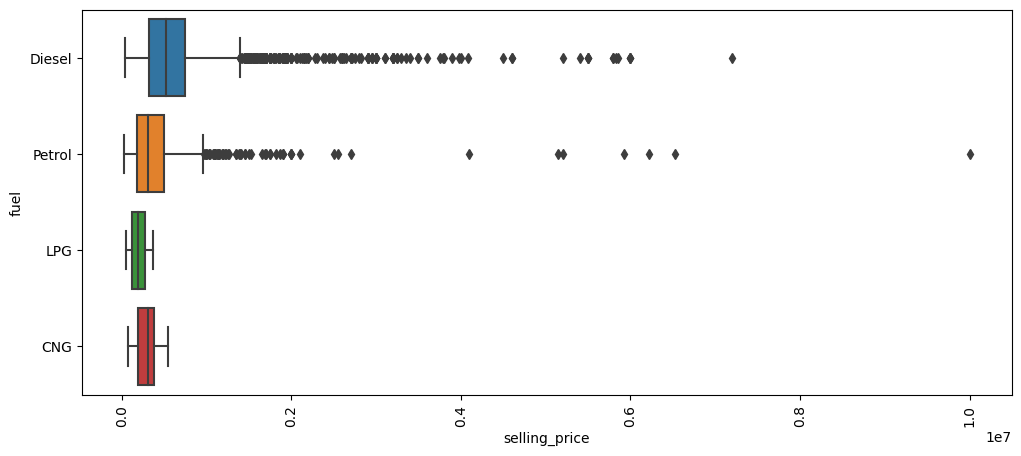

In [37]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(y='fuel', x='selling_price', data=df, ax=ax)
plt.xticks(rotation=90)
plt.show()

Я бы объединила две малые группы в одну. Посмотрим, можно ли это сделать

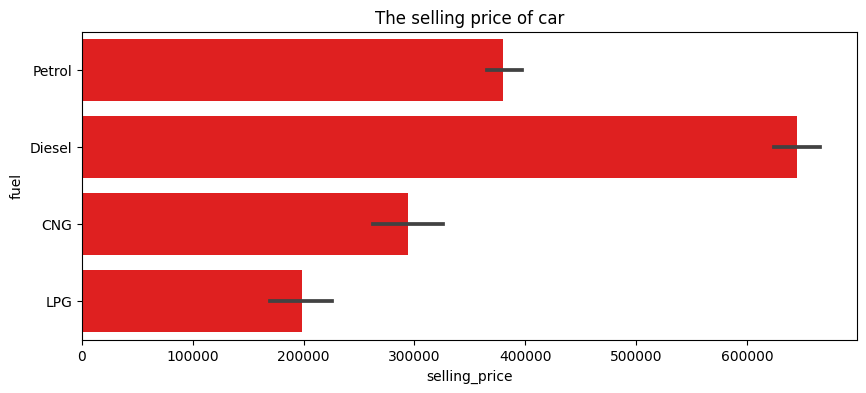

In [38]:
top_sell = df.sort_values(by='selling_price', ascending=False)
figure = plt.figure(figsize=(10,4))
sns.barplot(y=top_sell.fuel, x=top_sell.selling_price, color='red')
plt.xticks()
plt.xlabel('selling_price')
plt.ylabel('fuel')
plt.title('The selling price of car')
plt.show()

In [39]:
df.fuel.value_counts()

Diesel    3268
Petrol    2659
CNG         51
LPG         34
Name: fuel, dtype: int64

In [40]:
df.fuel = df.fuel.replace('LPG', 'Other').replace('CNG', 'Other')

Посмотрим столбуц расход топлива. Там есть два типа km/pl и km/kg

In [41]:
df.mileage.value_counts()

0             190
18.9 kmpl     184
19.7 kmpl     146
18.6 kmpl     129
21.1 kmpl     124
             ... 
42.0 kmpl       1
23.7 km/kg      1
15.63 kmpl      1
12.1 kmpl       1
16.51 kmpl      1
Name: mileage, Length: 387, dtype: int64

In [42]:
mileage= []
for i in df.mileage:
  if str(i) == '0':
    mileage.append(0)
  else:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        mileage.append(round(float(i), 2))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        mileage.append(round(float(i), 2))
df['mileage']=mileage

In [43]:
df_corr = df.loc[df['mileage'] != 0]

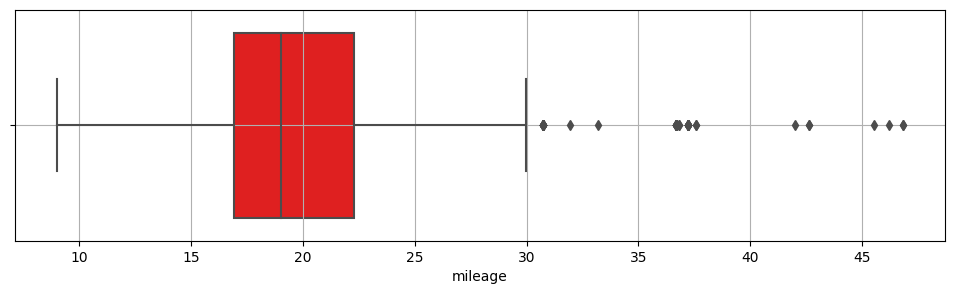

In [44]:
plt.figure(figsize=(12,3))
sns.boxplot(x = 'mileage', data = df_corr, color='red')
plt.grid()

In [45]:
df_min = df[df.mileage > 40]
df_min

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mark,model
31,2019,330000,10.0,Other,Individual,Manual,Second Owner,46.82,796 CC,40.3 bhp,60Nm@ 3500rpm,4.0,Maruti,Alto
151,2017,10000000,30.0,Petrol,Individual,Automatic,First Owner,42.00,1969 CC,400 bhp,640Nm@ 1740rpm,4.0,Volvo,XC90
707,2012,165000,60.0,Other,Individual,Manual,Second Owner,42.64,796 CC,47.3 bhp,69Nm@ 3500rpm,5.0,Maruti,Alto
1835,2013,270000,80.0,Other,Individual,Manual,Second Owner,45.53,998 CC,58.33 bhp,78Nm@ 3500rpm,5.0,Maruti,Wagon
3014,2017,260000,67.0,Other,Individual,Manual,First Owner,46.82,796 CC,40.3 bhp,60Nm@ 3500rpm,4.0,Maruti,Alto
3079,2013,178000,70.0,Other,Individual,Manual,Second Owner,42.64,796 CC,47.3 bhp,69Nm@ 3500rpm,5.0,Maruti,Alto
4340,2020,370000,16.0,Other,Individual,Manual,First Owner,46.20,796 CC,47.3 bhp,69Nm@ 3500rpm,5.0,Maruti,Alto


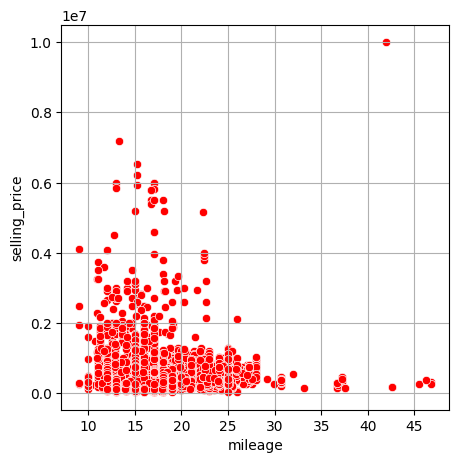

In [46]:
plt.figure(figsize=(5,5))
sns.scatterplot(x ='mileage', y='selling_price', data=df_corr, color='red')
plt.grid()

In [47]:
df.max_power.value_counts()

74 bhp       282
0            187
88.5 bhp     153
67 bhp       138
46.3 bhp     136
            ... 
58.33 bhp      1
92.7 bhp       1
86.79 bhp      1
80.8 bhp       1
177.5 bhp      1
Name: max_power, Length: 317, dtype: int64

In [48]:
df.max_power = df.max_power.str.strip(' bhp')

In [49]:
df.loc[df.max_power == '']

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mark,model
3669,2000,80000,100.0,Other,Individual,Manual,Second Owner,15.26,796 CC,,0,8.0,Maruti,Omni


In [50]:
df.max_power = df.max_power.replace('', '0').astype('float')

<Axes: ylabel='max_power'>

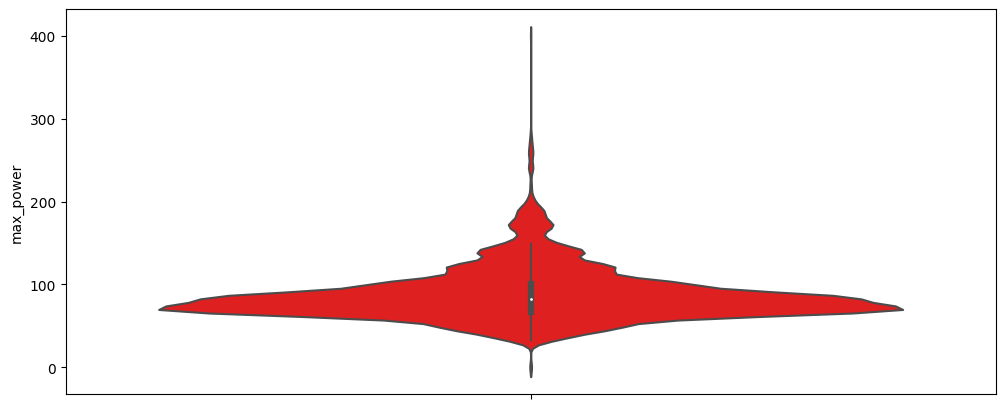

In [51]:
plt.figure(figsize=(12,5))
sns.violinplot(y= df.max_power, color='red')

In [52]:
df_min = df[df.max_power > 300]
df_min

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mark,model
151,2017,10000000,30.0,Petrol,Individual,Automatic,First Owner,42.0,1969 CC,400.0,640Nm@ 1740rpm,4.0,Volvo,XC90


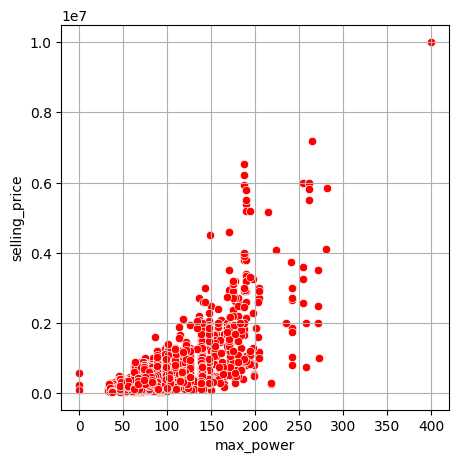

In [53]:
plt.figure(figsize=(5,5))
sns.scatterplot(x ='max_power', y='selling_price', data=df, color='red')
plt.grid()

Посмотрим количество мест. Я бы сделала этот признак бинарным: стандартное кол-во 5 и другое

In [54]:
df.seats.value_counts()

5.0     4571
7.0      819
8.0      196
0.0      190
4.0       97
9.0       69
6.0       49
10.0      18
2.0        2
14.0       1
Name: seats, dtype: int64

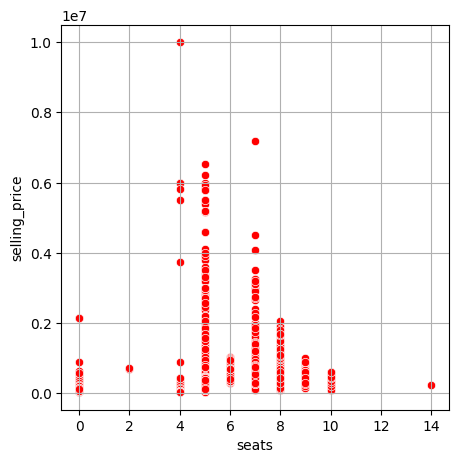

In [55]:
plt.figure(figsize=(5,5))
sns.scatterplot(x ='seats', y='selling_price', data=df, color='red')
plt.grid()

In [56]:
# после работы с пропусками
# seats= []
# for i in df.seats:
#   if i == 5:
#     seats.append(0)
#   else:
#     seats.append(1)
# df['seats']=seats

Столбец с моментом силы вряд ли получится привести в нормальный вид.
Дропнем его.

In [57]:
df.torque.value_counts()

190Nm@ 2000rpm            417
200Nm@ 1750rpm            346
90Nm@ 3500rpm             302
0                         191
62Nm@ 3000rpm             138
                         ... 
202Nm@ 3600-5200rpm         1
219.66NM@ 1500-2750rpm      1
382nm@ 1750-2250rpm         1
90Nm@ 2650rpm               1
250Nm@ 1250-5000rpm         1
Name: torque, Length: 420, dtype: int64

In [58]:
df['torque'] = df['torque'].str.replace('at','@')
df['torque'] = df['torque'].str.replace('Nm',' ')
df['torque'] = df['torque'].str.replace('rpm',' ')
df['torque'] = df['torque'].str.replace('@',' @')
df['torque'] = df['torque'].str.replace('(','').replace(')', '').replace(',', '')
df['torque'] = df['torque'].str.replace('kgm','')
df['torque'] = df['torque'].str.replace('   ',' ').replace('  ', '')

<ipython-input-58-4decb47e5cf1>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['torque'] = df['torque'].str.replace('(','').replace(')', '').replace(',', '')


Как мы видим, привести эти данные в нормальный вид сложно. Да и вряд ли при покупке авто люди задаются вопросом крутящего момента. Посмотрим чуть позже его корреляцию и примем решение об удалении.

In [59]:
#df = df.drop(columns = 'torque')

Рассмотрим двигатель, у нас данные в кубических см, значит СС можно отбросить

In [60]:
df.engine = df.engine.str.strip(' CC')

In [61]:
df.engine = df.engine.astype('float')
df.engine.max()

3604.0

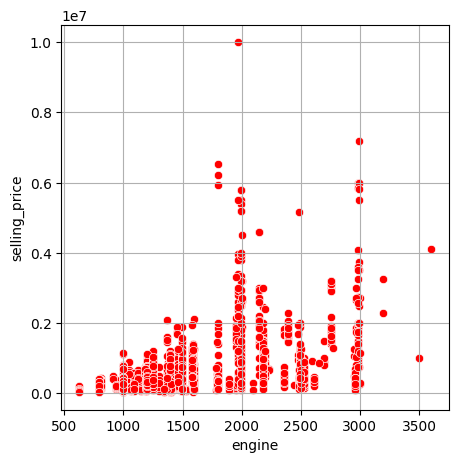

In [62]:
plt.figure(figsize=(5,5))
sns.scatterplot(x ='engine', y='selling_price', data=df, color='red')
plt.grid()

Для анализа удалим пустые ячейки

In [63]:
df = df.replace(0, np.nan)
df = df.dropna()

Оптимизируем числовые *столбцы*

In [64]:
df.seats = df.seats.astype('int64')
df.engine = df.engine.astype('int64')
df_numeric = df.select_dtypes('int64').columns.to_list()
df_numeric

['year', 'selling_price', 'engine', 'seats']

In [65]:
for el in df_numeric:
    for t in (np.int32, np.int16, np.int8):
        if (df[el] == df[el].astype(t)).sum() == len(df):
            df[el] = df[el].astype(t)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5807 entries, 0 to 6013
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5807 non-null   int16  
 1   selling_price  5807 non-null   int32  
 2   km_driven      5807 non-null   float64
 3   fuel           5807 non-null   object 
 4   seller_type    5807 non-null   object 
 5   transmission   5807 non-null   object 
 6   owner          5807 non-null   object 
 7   mileage        5807 non-null   float64
 8   engine         5807 non-null   int16  
 9   max_power      5807 non-null   float64
 10  torque         5807 non-null   object 
 11  seats          5807 non-null   int8   
 12  mark           5807 non-null   object 
 13  model          5807 non-null   object 
dtypes: float64(3), int16(2), int32(1), int8(1), object(7)
memory usage: 550.1+ KB


In [66]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mark,model
0,2014,450000,145.5,Diesel,Individual,Manual,First Owner,23.0,1248,74.00,190 @ 2000,5,Maruti,Swift
1,2014,370000,120.0,Diesel,Individual,Manual,Second Owner,21.1,1498,103.52,250 @ 1500-2500,5,Skoda,Rapid
2,2010,225000,127.0,Diesel,Individual,Manual,First Owner,23.0,1396,90.00,22.4 @ 1750-2750,5,Hyundai,i20
3,2007,130000,120.0,Petrol,Individual,Manual,First Owner,16.0,1298,88.20,"11.5 @ 4,500 @ )",5,Maruti,Swift
4,2017,440000,45.0,Petrol,Individual,Manual,First Owner,20.1,1197,81.86,113.75nm @ 4000,5,Hyundai,Xcent


In [67]:
df.transmission.value_counts()

Manual       5311
Automatic     496
Name: transmission, dtype: int64

In [68]:
df.owner.value_counts()

First Owner             3648
Second Owner            1611
Third Owner              418
Fourth & Above Owner     126
Test Drive Car             4
Name: owner, dtype: int64

In [69]:
df.seller_type.value_counts()

Individual          5204
Dealer               578
Trustmark Dealer      25
Name: seller_type, dtype: int64

Посмотрим можно ли их объединить

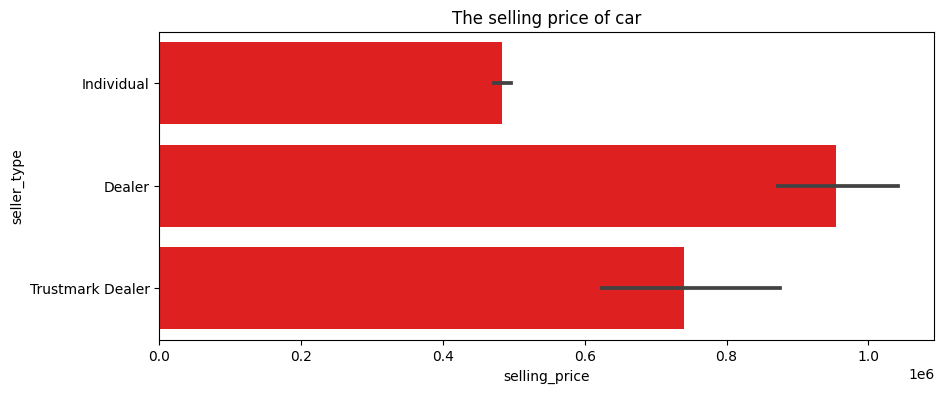

In [70]:
top_sell = df.sort_values(by='selling_price', ascending=False)
figure = plt.figure(figsize=(10,4))
sns.barplot(y=top_sell.seller_type, x=top_sell.selling_price, color='red')
plt.xticks()
plt.xlabel('selling_price')
plt.ylabel('seller_type')
plt.title('The selling price of car')
plt.show()

Нельзя, так как видно, что цена у дилера официального выше

Сохраним файл для работы с приложением.

In [71]:
df.to_csv('df_cars.csv', index=False)

In [72]:
cat_feat = df.select_dtypes(include='object')
cat_feat.describe()

,fuel,seller_type,transmission,owner,torque,mark,model
count,5807,5807,5807,5807,5807,5807,5807
unique,3,3,2,5,409,29,191
top,Diesel,Individual,Manual,First Owner,190 @ 2000,Maruti,Swift
freq,3172,5204,5311,3648,418,1813,544


In [73]:
#cat_feat = ['fuel', 'seller_type', 'transmission', 'owner']


К сожалению, данная кодировка работать в Pycharm не захотела

In [74]:
#!pip install category_encoders

In [75]:
# import category_encoders as ce

# encoder = ce.OneHotEncoder(cols = cat_feat)
# df = encoder.fit_transform(df)
# df.shape

In [76]:
df_copy = df.copy()

In [77]:
encoder_cat(df_copy)

<Axes: >

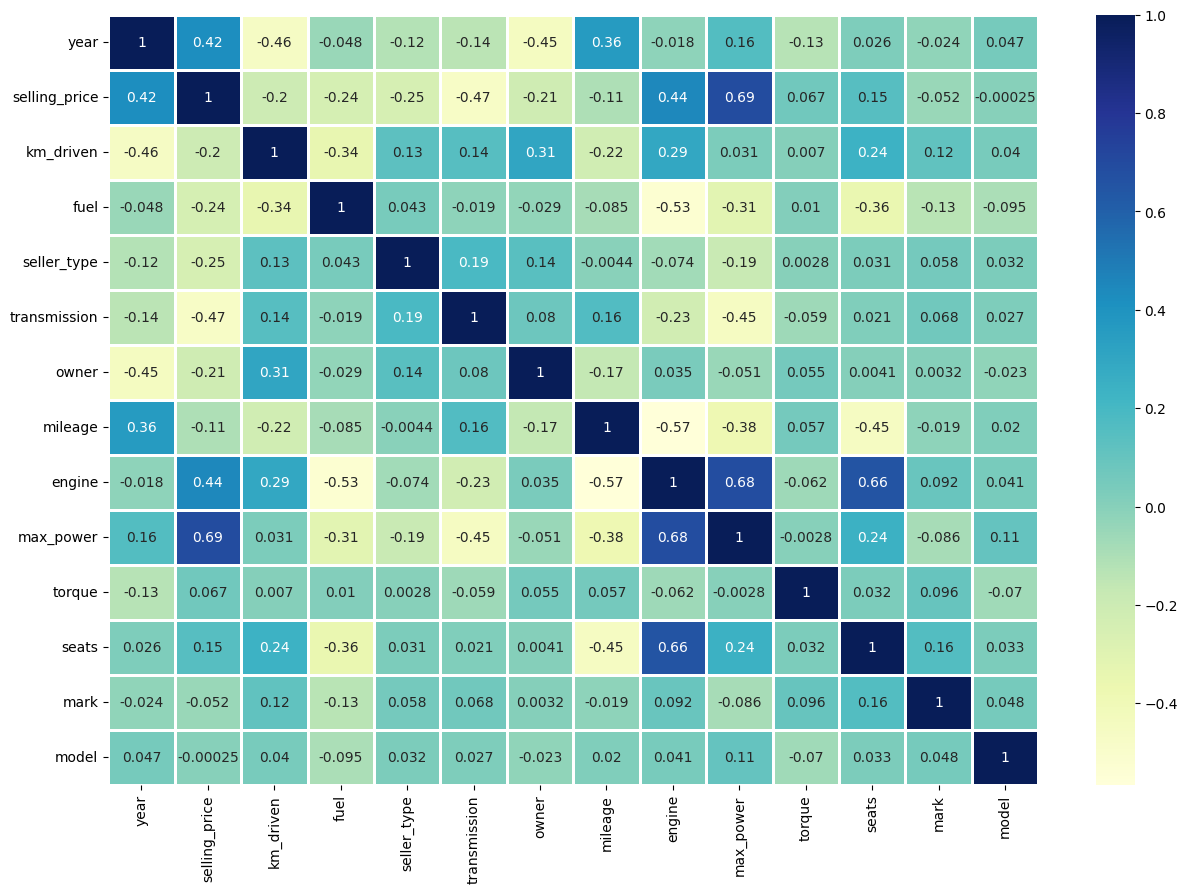

In [78]:
fig = plt.subplots(ncols=1, figsize=(15,10))
sns.heatmap(df_copy.corr(), annot = True, linewidths=0.8, cmap = 'YlGnBu')

Корреляция цены и крутящего момента 0.067, этот столбец можно отбросить.

In [79]:
df = df.drop(columns = 'torque')

# Model

Подготовим модель

In [80]:
y = df['selling_price']
X = df.drop(columns= ['selling_price'])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 234)

In [82]:
X_train.describe()

,year,km_driven,mileage,engine,max_power,seats
count,4355.000000,4355.000000,4355.000000,4355.000000,4355.000000,4355.000000
mean,2013.635132,72.319007,19.359614,1433.572216,88.089951,5.434214
std,3.888998,47.944315,4.210468,490.037761,31.802357,0.991223
min,1994.000000,0.001000,9.000000,624.000000,32.800000,4.000000
25%,2011.000000,36.900000,16.700000,1197.000000,68.000000,5.000000
50%,2014.000000,67.082000,19.000000,1248.000000,81.830000,5.000000
75%,2017.000000,100.000000,22.300000,1498.000000,100.000000,5.000000
max,2020.000000,577.414000,46.200000,3604.000000,280.000000,14.000000


Переведем категориальные признаки в числовые.

In [83]:
encoder_cat(X_train)

In [84]:
encoder_cat(X_test)

Также попробуем сделать нормализацию.

In [85]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
scaled_minmax = minmax.fit_transform(X_train)
scaled_minmax_X_train = pd.DataFrame(scaled_minmax, columns = X_train.columns)
scaled_minmax_X_test = pd.DataFrame(scaled_minmax, columns = X_test.columns)
scaled_minmax_X_train.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,mark,model
0,0.769231,0.138547,1.0,0.5,1.0,0.5,0.400538,0.125503,0.138552,0.1,0.678571,0.060109
1,0.730769,0.207822,0.0,0.5,1.0,0.0,0.349462,0.192953,0.166262,0.1,0.964286,0.601093
2,0.884615,0.051954,1.0,0.5,1.0,0.0,0.241935,0.192282,0.198341,0.1,0.357143,1.000000
3,0.730769,0.051954,1.0,0.5,1.0,0.0,0.430108,0.000000,0.018932,0.0,0.892857,0.546448
4,0.884615,0.034636,1.0,0.5,1.0,0.0,0.215054,0.324497,0.358010,0.1,0.357143,0.868852


In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lm =LinearRegression()
lm.fit(X_train, y_train)
count_metrics(lm)

The R2 train value is: 0.6231
Results of LinearRegression()
The R2 value of LinearRegression() is 0.6297
MAE Error is 171972.13259
Cross validation train is [0.57712279 0.68670086 0.65660162 0.57715603 0.66914649 0.55710348
 0.65151356 0.58774244 0.60616895 0.63382449]
____________________________


In [88]:
lm.fit(scaled_minmax_X_train, y_train)
count_metrics(lm)

The R2 train value is: 0.6231
Results of LinearRegression()
The R2 value of LinearRegression() is 0.6297
MAE Error is 171972.13259
Cross validation train is [0.57712279 0.68670086 0.65660162 0.57715603 0.66914649 0.55710348
 0.65151356 0.58774244 0.60616895 0.63382449]
____________________________


Нормализация не дает улучшения. Попробуем более сложную модель, например XGBRegressor

In [89]:
import pickle

with open('model_lm.pickle', 'wb') as file:
  pickle.dump(lm, file)

In [90]:
!pip install xgboost
import xgboost
from xgboost import XGBRegressor

In [91]:
xgbr = XGBRegressor(n_estimators=8, learning_rate=0.5, random_state=1234)
count_metrics(xgbr)

The R2 train value is: 0.9695
Results of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=8, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1234, ...)
The R2 value of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_c

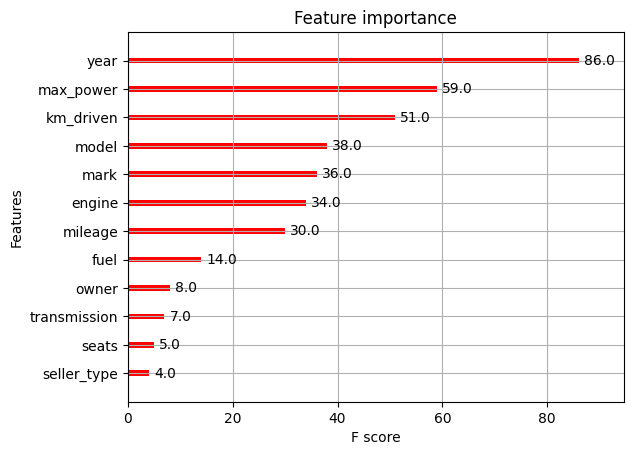

In [92]:
xgboost.plot_importance(xgbr, color='red')
plt.rcParams['figure.figsize'] = [10, 4]
plt.show()

In [93]:
y_pred = xgbr.predict(X_test)

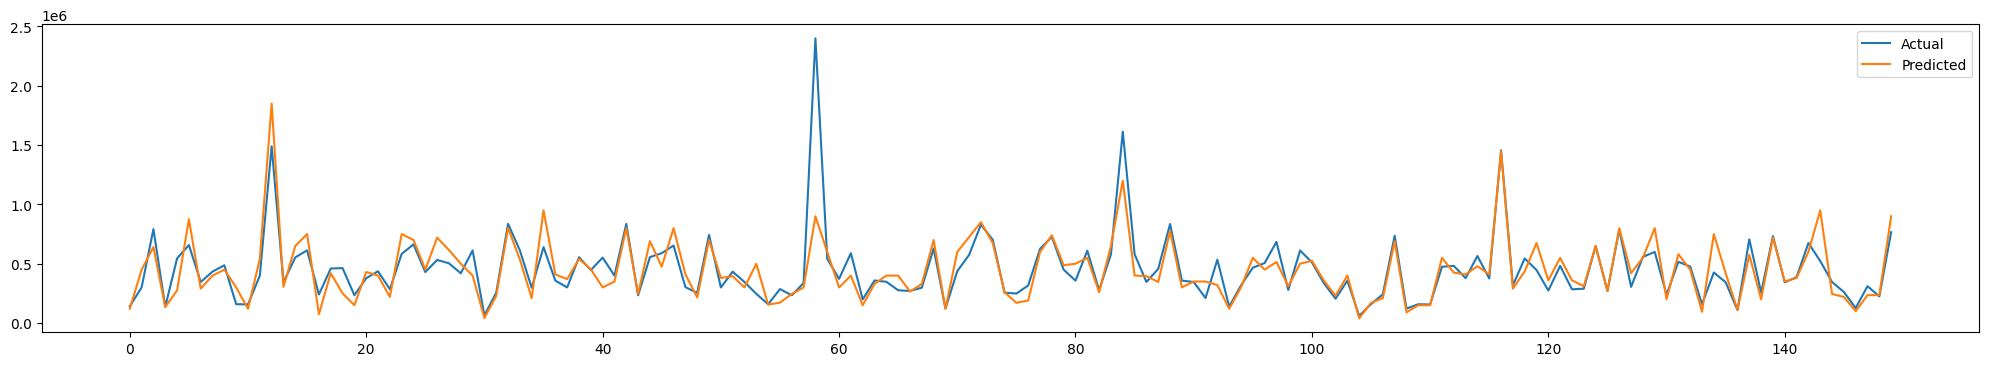

In [94]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(25,4))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:150])
plt.legend(['Actual','Predicted'])

In [95]:
with open('model_xgb.pickle', 'wb') as file:
  pickle.dump(lm, file)

Если не выделять столбцы модель и марка автомобиля, то модель начинает заучивать данные. Разделив столбец с названием, удалось получить важные признаки, похожие на истину.

Попробуем еще одну модель:

In [96]:
!pip install lightgbm
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor

In [98]:
# Для проверки не переобучилась ли модель
print(f"The R2 train value is: {round(r2_score(y_train,gbm.predict(X_train)), 4)}")

The R2 train value is: 0.9271


In [102]:
r2 = r2_score(y_test, y_pred)
print(f"The R2 value is {round(r2, 4)}")

The R2 value is 0.8245


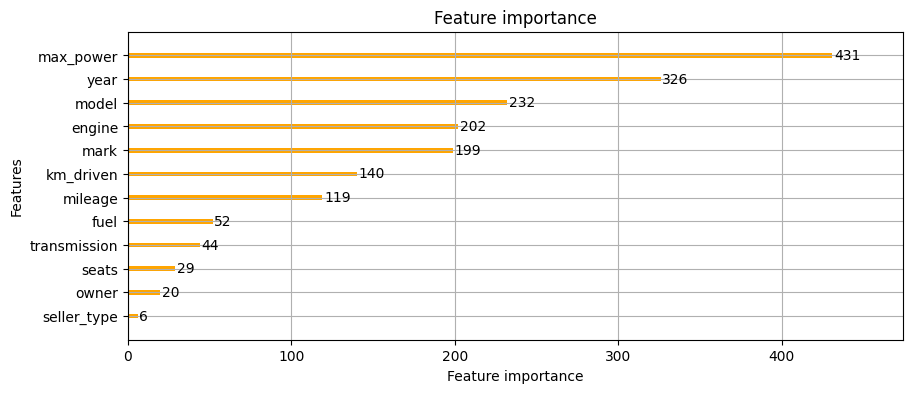

In [99]:
lgb.plot_importance(gbm, color='red')
plt.rcParams['figure.figsize'] = [12, 6]
plt.show()

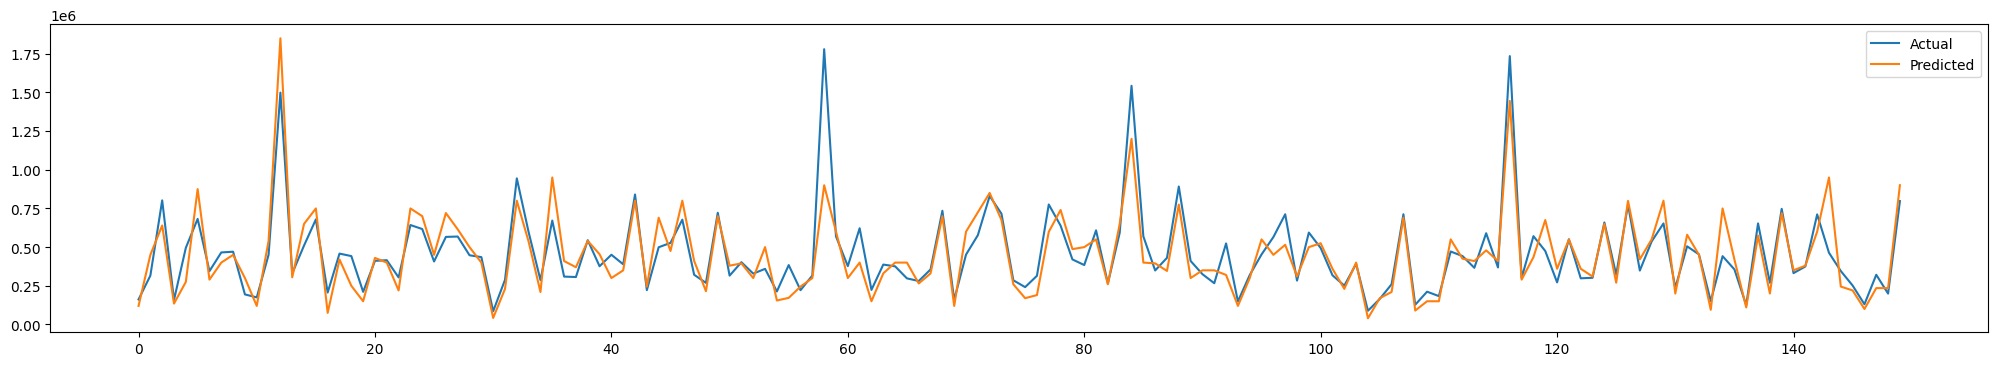

In [101]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(25,4))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:150])
plt.legend(['Actual','Predicted'])

In [103]:
with open('model_lgbm.pickle', 'wb') as file:
  pickle.dump(lm, file)